In [38]:
%load_ext autoreload

In [96]:
%autoreload 2
from AGN_plot import *

In [101]:
def plot_default(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)

    Abu1.plot(ax=ax, spe=spe, label='X-ray', color=color)
    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                      fontsize=25)
    ax.set_xlim([1e-1, 1e8])
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(ax=ax, spe=spe, color=color, linestyle='--', label='X-ray removed')
        
    
    raw = np.loadtxt('./data/2dis_inf')
    t = raw[:, 0] - 1e6
    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(prop={'size': 20})

In [3]:
def plot_dis(spe, div=None, d=[], stop=True, ax=None):
    if d == []:
        d = np.arange(8) + 1
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    for i in d:
        j = str(i)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)

        Abu1.plot(ax=ax, spe=spe, label=j + ' kpc', color=Col[i - 1])
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
        ax.set_ylabel(r'$n{()}$'.format(latex_name(spe)) + '/' + Abu1.name_div,
                      fontsize=25)
        if stop:
            for i in d:
                j = '0' + str(i)
                Abu0 = Abu(j)
                if div != None:
                    Abu.Div(div)
                Abu0.plot(ax=ax, spe=spe, color=Col[i - 1], linestyle='--')
                Abu0.plot_ul(ax=ax, spe=spe, color=Col[i - 1])
                ax.fill_between(Abu0.dt,
                                Abu0.abu_l[:, eval('krome_idx_' + spe)],
                                Abu0.abu_u[:, eval('krome_idx_' + spe)],
                                color=Col[i - 1],
                                alpha=0.3)
    '''for i, dis in enumerate(d, 1):
        raw = np.loadtxt('./data/{}dis_inf'.format(str(i)))
        t = raw[:, 0] - 1e6
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t,
                  abu,
                  label='{}infinity'.format(str(i)),
                  color=Col[dis - 1],
                  linestyle='-.',
                  linewidth=5)'''
    ax.set_xlim([0, 1e8])
    ax.legend(prop={'size': 25})

In [76]:
def plot_col(spe, div=None, d=[], stop=True, ax=None):
    if d == []:
        d = np.arange(8) + 1
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    for i in d:
        j = str(i)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)

        Abu1.plot(ax=ax, spe=spe, label=j + ' kpc', color=Col[i - 1])
        
        ax.set_xlim([0, 1e8])
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
        ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + Abu1.name_div,
                      fontsize=25)
        if stop:
            for i in d:
                j = '0' + str(i)
                Abu0 = Abu(j)
                if div != None:
                    Abu.Div(div)
                Abu0.plot(ax=ax, spe=spe, color=Col[i - 1], linestyle='--')
                Abu0.plot_ul(ax=ax, spe=spe, color=Col[i - 1])
                ax.fill_between(Abu0.dt,
                                Abu0.abu_l[:, eval('krome_idx_' + spe)],
                                Abu0.abu_u[:, eval('krome_idx_' + spe)],
                                color=Col[i - 1],
                                alpha=0.3)
    '''for i, dis in enumerate(d, 1):
        raw = np.loadtxt('./data/{}dis_inf'.format(str(i)))
        t = raw[:, 0] - 1e6
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t,
                  abu,
                  label='{}infinity'.format(str(i)),
                  color=Col[dis - 1],
                  linestyle='-.',
                  linewidth=5)'''
    ax.legend(prop={'size': 25})

In [5]:
def plot_group(*args):
    l = len(args)
    if l == 1:
        f, ax = plt.subplot(figsize=(24, 8))
        plot_all(args[0], ax=ax)
        return
    line = int(np.ceil(l / 2))
    f, ax = plt.subplots(line, 2, figsize=(24, 8 * line))
    ax = ax.flatten()
    if l % 2:
        f.delaxes(ax[-1])
    print(l)
    for i, spe in enumerate(args):
        plot_all(spe, ax=ax[i], d=np.array([4]))
    plt.tight_layout()

In [6]:
'''plot_group('H2O', 'H_DUSTH_DUSTO_DUST', 'CH3OH',
           'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'H2CO',
           'H_DUSTH_DUSTC_DUSTO_DUST')'''

"plot_group('H2O', 'H_DUSTH_DUSTO_DUST', 'CH3OH',\n           'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'H2CO',\n           'H_DUSTH_DUSTC_DUSTO_DUST')"

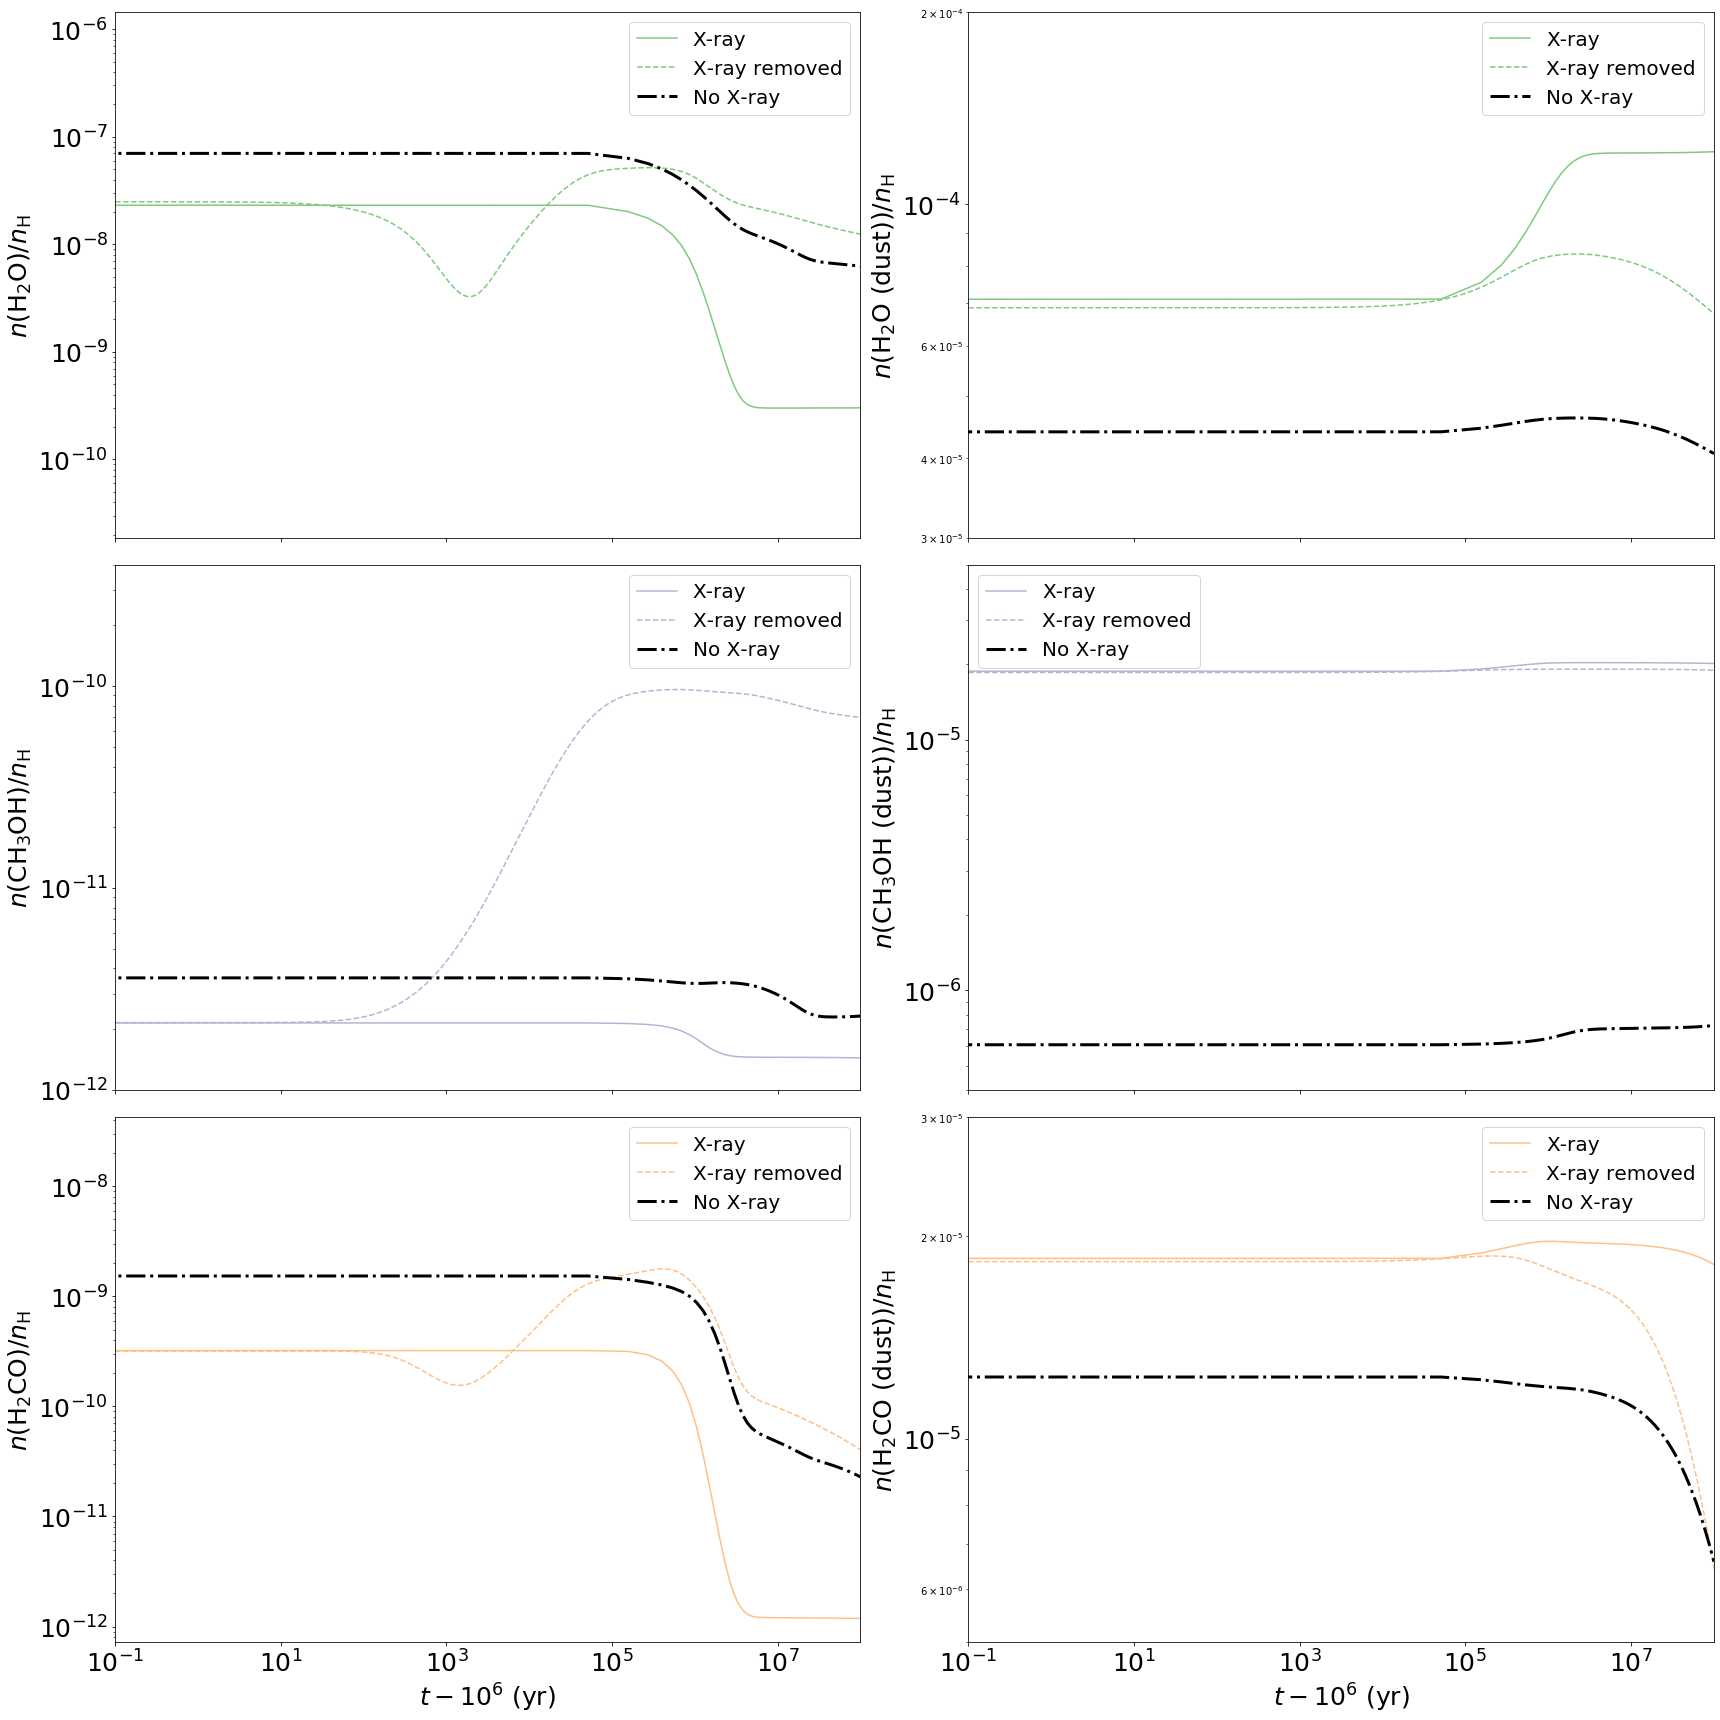

In [102]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H2O', ax=ax[0], color=c_default[0])
plot_default('CH3OH', ax=ax[2], color=c_default[1])
plot_default('H2CO', ax=ax[4], color=c_default[2])

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[1],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
             ax=ax[3],
             color=c_default[1],
             label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_default('H_DUSTH_DUSTC_DUSTO_DUST',
             ax=ax[5],
             color=c_default[2],
             label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-7, 1e-4])
ax[1].set_ylim([2e-4, 3e-5])
ax[2].set_ylim([1e-12, 4e-10])
ax[3].set_ylim([4e-7, 5e-5])
#ax[4].set_ylim([10**(-7.5), 10**(-10)])
ax[5].set_ylim([5e-6, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/default.eps')

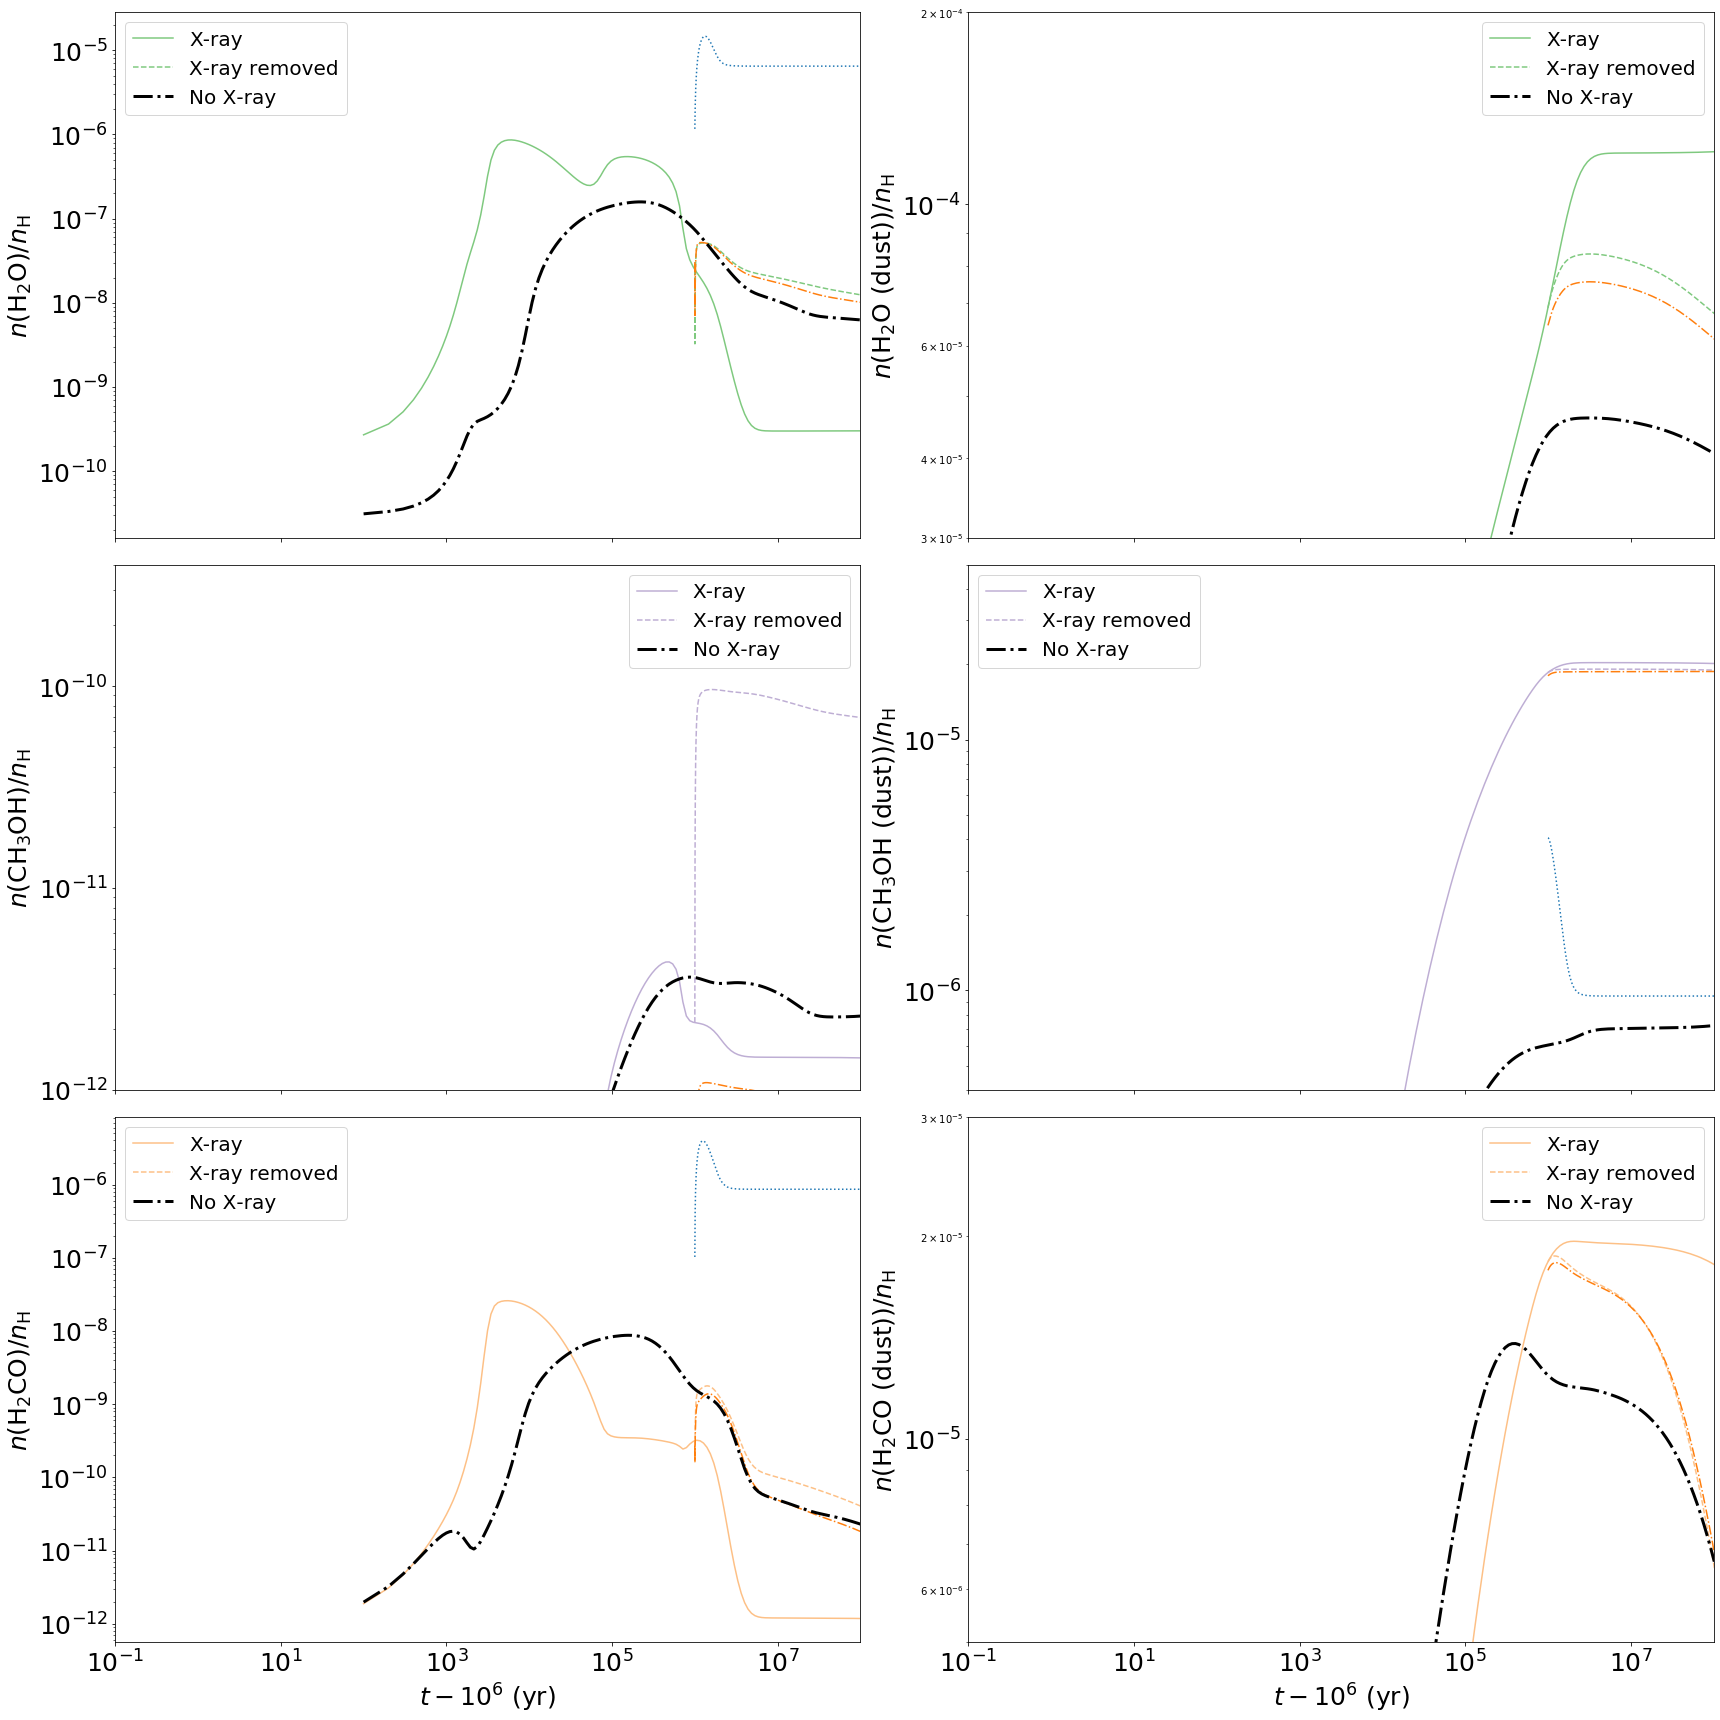

In [94]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H2O', ax=ax[0], color=c_default[0])
plot_default('CH3OH', ax=ax[2], color=c_default[1])
plot_default('H2CO', ax=ax[4], color=c_default[2])

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[1],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
             ax=ax[3],
             color=c_default[1],
             label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_default('H_DUSTH_DUSTC_DUSTO_DUST',
             ax=ax[5],
             color=c_default[2],
             label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-7, 1e-4])
ax[1].set_ylim([2e-4, 3e-5])
ax[2].set_ylim([1e-12, 4e-10])
ax[3].set_ylim([4e-7, 5e-5])
#ax[4].set_ylim([10**(-7.5), 10**(-10)])
ax[5].set_ylim([5e-6, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()

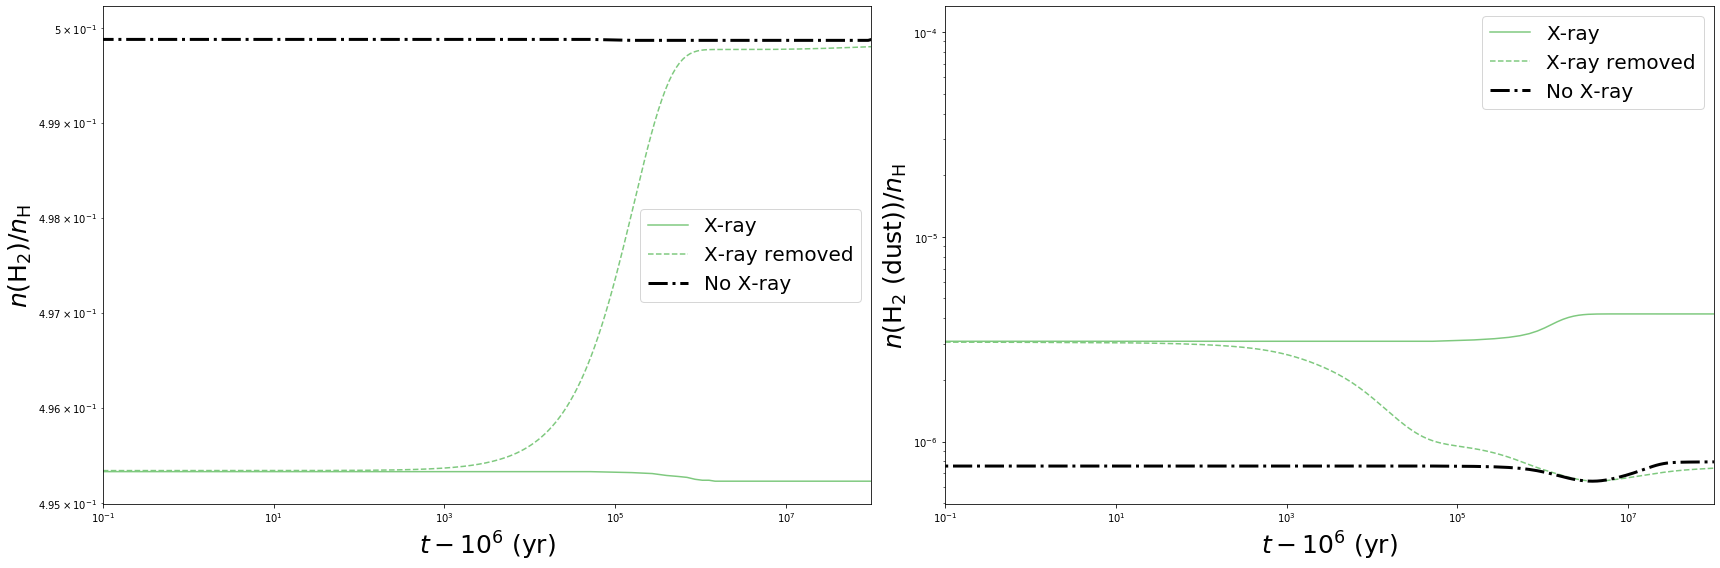

In [103]:
f, ax = plt.subplots(1, 2, figsize=(24, 8), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H2', ax=ax[0], color=c_default[0])

plot_default('E',
             ax=ax[1],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2')))
ax[0].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[1].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
plt.tight_layout()